In [3]:
import torch
import torchvision.ops
from torch import nn
from PIL import Image
import torchvision.transforms as transforms
import cv2
import time
import os
import random 
import numpy as np


from matplotlib import pyplot as plt
from math import atan2, pi, sin , cos, sqrt

import sys
visualDet3D_path = os.path.dirname(sys.path[0])  #two folders upwards
sys.path.insert(0, visualDet3D_path)

from visualDet3D.networks.lib.pac_module import xyz_2_uv, uvy_2_xyz, get_slope, PerspectiveConv2d
from visualDet3D.utils.util_kitti import init_img_plt, kitti_calib_file_parser, init_img_plt_without_bev, load_tf_image

random.seed(2222)
NUM_IMAGE_SHOW = 8

# Image files
IMG_DIR = "../dataset/kitti/training/image_2/"
# Anotations files
ANO_DIR = "../dataset/kitti/training/label_2/"
# Calibration files
CAR_DIR = "../dataset/kitti/training/calib/"

# 
BEV_SIZE = 400 # pixel
MAX_DIS = 60 # m
AVG_Y3D_CENTER = 0.94677

# Visualize PAC with 2d_offset

Update offset cache
Update offset cache
Update offset cache
Update offset cache
Update offset cache
Update offset cache
Update offset cache
Update offset cache


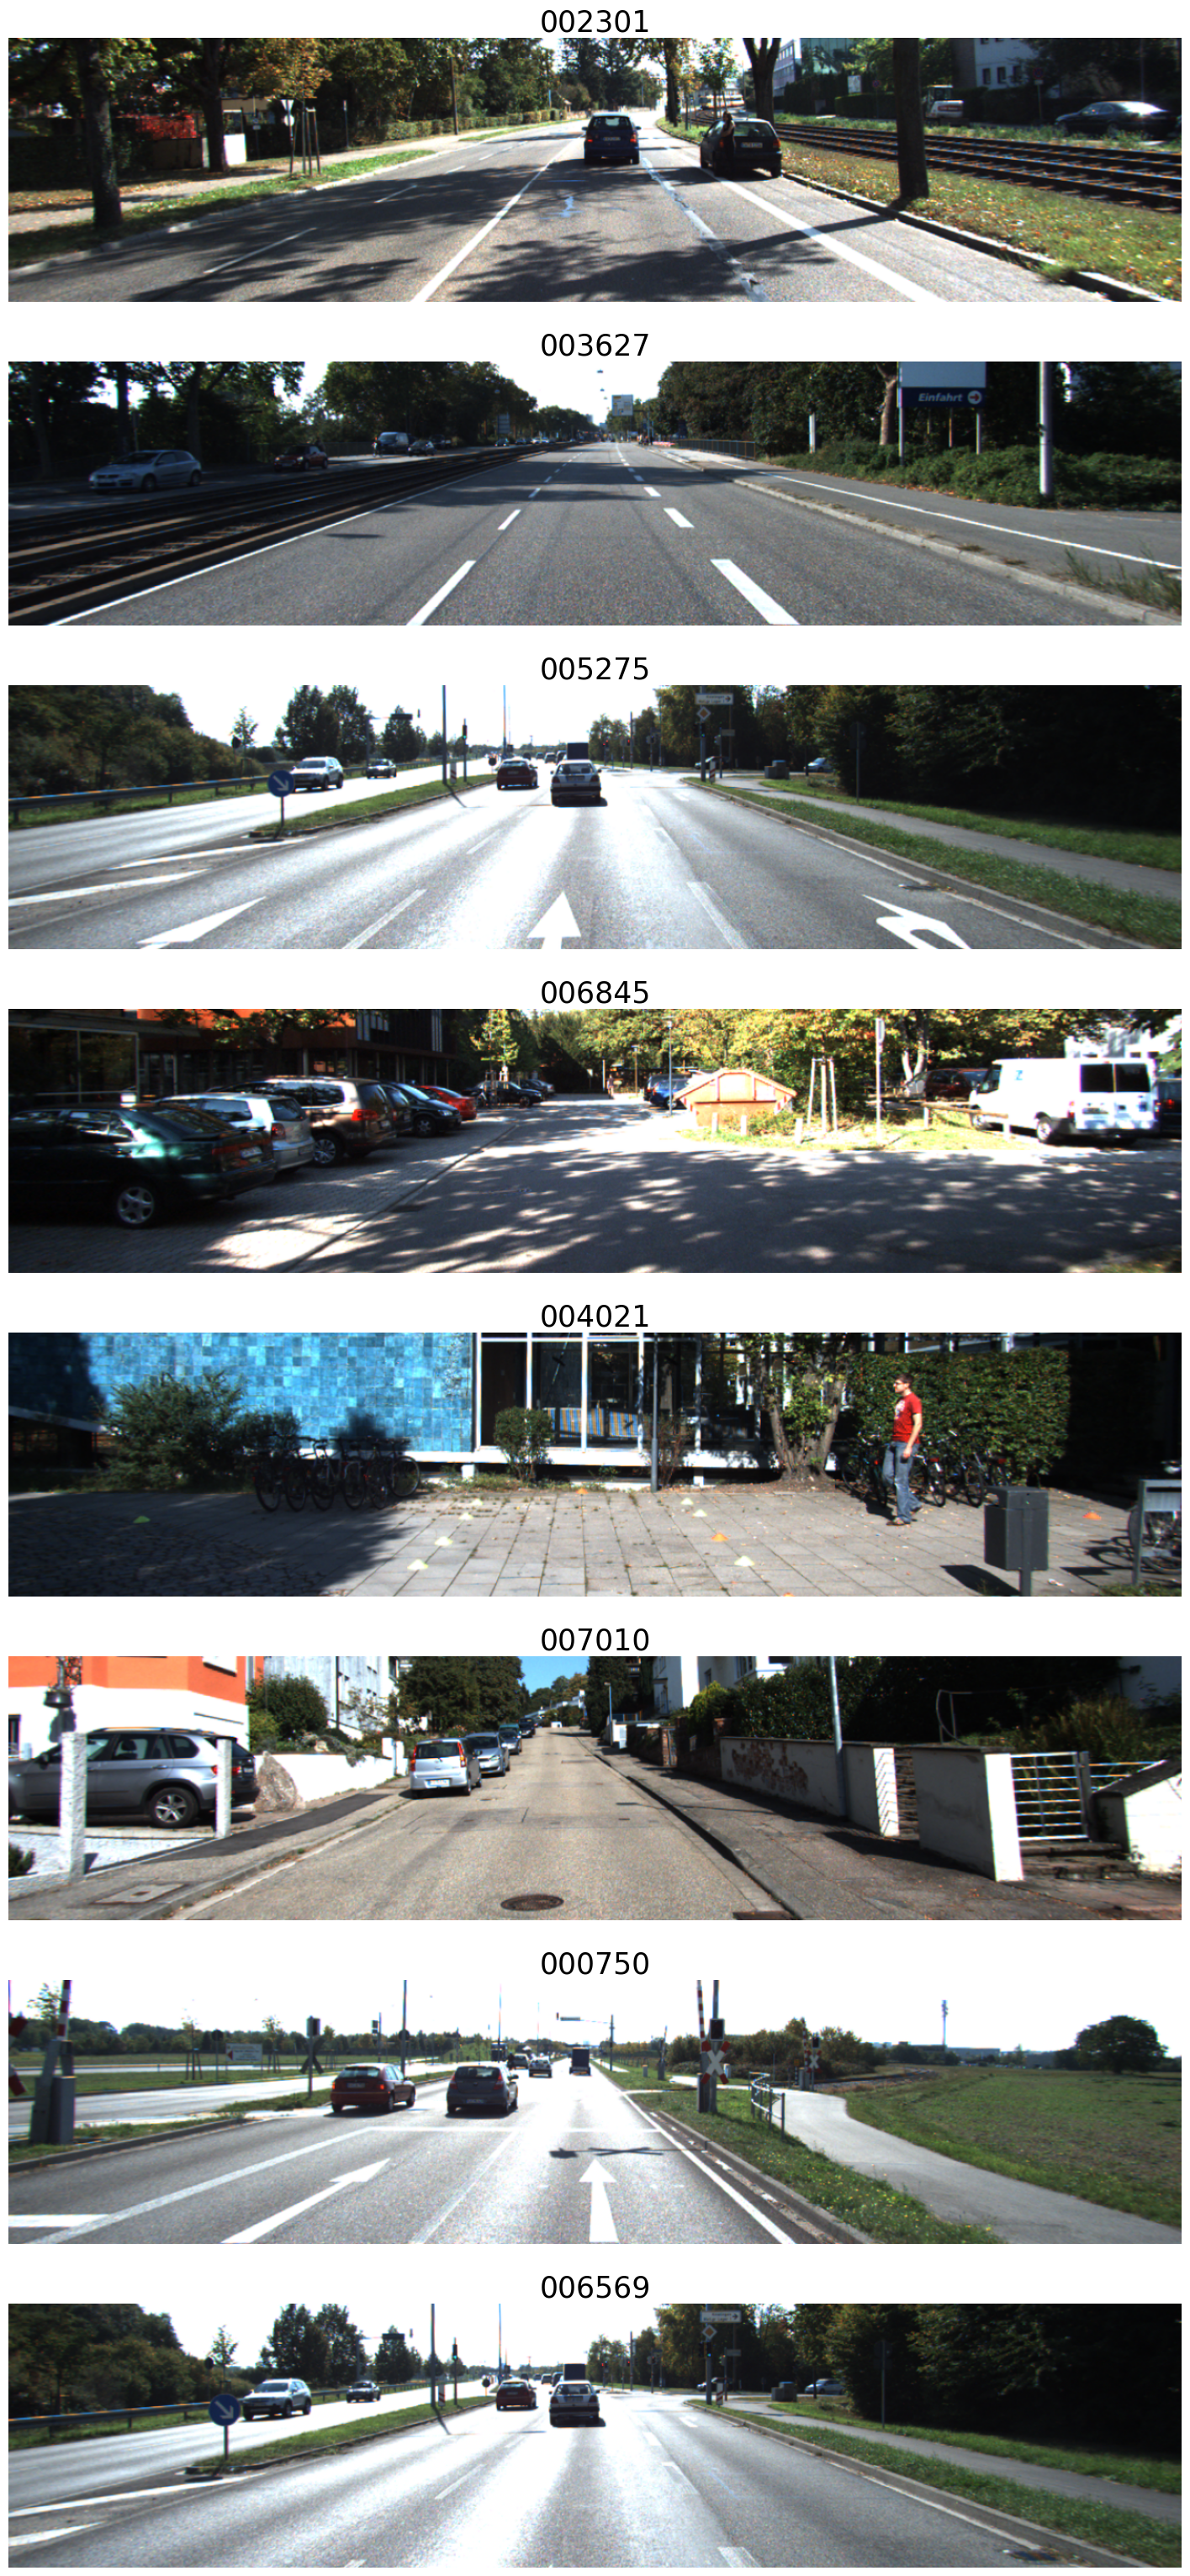

In [11]:
# Get image list
img_names = [i.split('.')[0] for i in os.listdir(IMG_DIR)]
random.shuffle(img_names)
chose_name = img_names[:NUM_IMAGE_SHOW]
chose_name = ['002301', '003627', '005275', '006845', '004021' , '007010', '000750', '006569']

chose_img = []
chose_P2  = []
for i_name, name in enumerate(chose_name):
    
    # Load image
    img = load_tf_image(os.path.join(IMG_DIR, f"{name}.png"))

    img_ori_h, img_ori_w, _ = img.shape
    
    P2 = kitti_calib_file_parser(os.path.join(CAR_DIR, f"{name}.txt"),
                                 new_shape_tf = (288, 1280), 
                                 crop_tf = 100)
    cu, cv = (P2[0, 2], P2[1, 2])
    height, width, channel = img.shape
    
    pac = PerspectiveConv2d(1, 1, input_shape=(18, 80), d_rate_xy = (32, 32), lock_theta_ortho = False)
    

    # Get offset
    offset = pac.get_offset(P2) # [1, 18, 18, 80]
    
    # u_stride = 128
    # v_stride = 64
    # for u in range(u_stride//2, 1280, u_stride):
    #     for v in range(v_stride//2, 288, v_stride):
    #         color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            
    #         # Use Fix 2d offset
    #         dcx = 64
    #         dcy = 64
    #         chose_name[i_name] = name + "_2D_offset"
    #         slope = get_slope((u, v, AVG_Y3D_CENTER), P2) # cap to  500
    #         theta = atan2(slope, 1)
            
    #         # theta = pi/2 
    #         dx = dcy*cos(theta)
    #         dy = dcy*sin(theta)
    #         dsx = dcy - sqrt(1 + slope**2)
            
    #         offset_pts = [(u-dcx-dx, v-dy), (u-dx, v-dy), (u+dcx-dx, v-dy),
    #                       (u-dcx   , v   ), (u   , v   ), (u+dcx   , v   ),
    #                       (u-dcx+dx, v+dy), (u+dx, v+dy), (u+dcx+dx, v+dy)]
            
    #         for ui, vi in offset_pts:
    #             img = cv2.circle(img, (int(ui), int(vi)) , 1, color, 4)
            
    #         # print([offset_pts[0], offset_pts[2], offset_pts[8], offset_pts[6]])
    #         polygon_pts = np.array([offset_pts[0], offset_pts[2], offset_pts[8], offset_pts[6]], np.int32)
    #         # draw the polygon on the image
    #         cv2.polylines(img, [polygon_pts.reshape((-1,1,2))], True, color)

    chose_P2.append(P2)
    chose_img.append(img)

axs = init_img_plt_without_bev(chose_img, titles = chose_name)
